# PART 2 & 3 & 4

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
from functools import reduce
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, GRU
import keras.utils
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Using TensorFlow backend.


In [2]:
import constants as c

[NbConvertApp] Converting notebook basic_io.ipynb to python
[NbConvertApp] Writing 6162 bytes to basic_io.py
[NbConvertApp] Converting notebook model.ipynb to python
[NbConvertApp] Writing 19431 bytes to model.py






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 28, 10)            900       
_________________________________________________________________
gru_2 (GRU)                  (None, 20)                1860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,781
Trainable params: 2,781
Non-trainable params: 0
_________________________________________________________________
None

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3103 samples, validate on 178 samples
Epoch 1/50
3103/3103 [==============================] - 4s 1ms/step - loss: 0.1085 - mean_squared_error: 0.0244 - v

3103/3103 [==============================] - 2s 623us/step - loss: 0.0106 - mean_squared_error: 2.5774e-04 - val_loss: 0.0157 - val_mean_squared_error: 3.3026e-04
Epoch 34/50
3103/3103 [==============================] - 2s 572us/step - loss: 0.0102 - mean_squared_error: 2.4287e-04 - val_loss: 0.0146 - val_mean_squared_error: 2.9115e-04
Epoch 35/50
3103/3103 [==============================] - 2s 586us/step - loss: 0.0111 - mean_squared_error: 2.7439e-04 - val_loss: 0.0280 - val_mean_squared_error: 9.8914e-04
Epoch 36/50
3103/3103 [==============================] - 2s 608us/step - loss: 0.0102 - mean_squared_error: 2.4588e-04 - val_loss: 0.0150 - val_mean_squared_error: 3.0258e-04
Epoch 37/50
3103/3103 [==============================] - 2s 614us/step - loss: 0.0101 - mean_squared_error: 2.4060e-04 - val_loss: 0.0160 - val_mean_squared_error: 3.3765e-04
Epoch 38/50
3103/3103 [==============================] - 2s 532us/step - loss: 0.0101 - mean_squared_error: 2.4124e-04 - val_loss: 0.0160

[NbConvertApp] Converting notebook constants.ipynb to python
[NbConvertApp] Writing 2767 bytes to constants.py


# PART3

(a) Build 2 simple benchmark predictions, and calculate MAE for the following on the validation set.    
a. Using an average (e.g. your prediction for each target period is an average of the BTC prices in the lookback period)   
b. Using the last value (e.g. your prediction for each target period is the most recent BTC price in the lookback period)    

Average Predictor

#############################evaluation mae and rmse#######################################
{'MAE': 0.16256697885693283, 'RMSE': 0.20550151193868305}
178
178


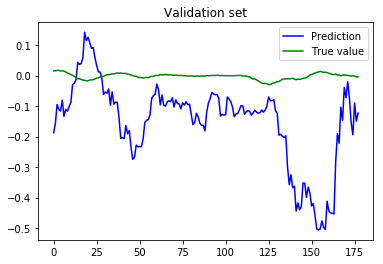

In [3]:
c.benchmark_model.get_res1()

Last Value Predictor

In [4]:
c.benchmark_model.get_res2()

#############################evaluation mae and rmse#######################################
{'MAE': 0.4748835080304846, 'RMSE': 0.7184994173473644}


(b) Build and train a simple neural network by flattening the data, and using 2 (dense) layers and calculate the train and validation loss for each epoch.

In [5]:
# Train Neural Network
c.NN_model.train_nn()

Train on 3103 samples, validate on 178 samples
Epoch 1/100
3103/3103 [==============================] - 2s 522us/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142
Epoch 2/100
3103/3103 [==============================] - 0s 42us/step - loss: 0.0096 - mean_absolute_error: 0.0096 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084
Epoch 3/100
3103/3103 [==============================] - 0s 39us/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103
Epoch 4/100
3103/3103 [==============================] - 0s 40us/step - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 5/100
3103/3103 [==============================] - 0s 41us/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074
Epoch 6/100
3103/3103 [==============================] - 0s 44us/step - loss: 0.0066 - mean_absolute_error: 0.00

3103/3103 [==============================] - 0s 47us/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132
Epoch 50/100
3103/3103 [==============================] - 0s 41us/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106
Epoch 51/100
3103/3103 [==============================] - 0s 44us/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 52/100
3103/3103 [==============================] - 0s 41us/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109
Epoch 53/100
3103/3103 [==============================] - 0s 42us/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154
Epoch 54/100
3103/3103 [==============================] - 0s 39us/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122

3103/3103 [==============================] - 0s 33us/step - loss: 0.0017 - mean_absolute_error: 0.0017 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111
Epoch 98/100
3103/3103 [==============================] - 0s 31us/step - loss: 0.0014 - mean_absolute_error: 0.0014 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097
Epoch 99/100
3103/3103 [==============================] - 0s 34us/step - loss: 0.0016 - mean_absolute_error: 0.0016 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111
Epoch 100/100
178/178 [==============================] - 0s 56us/step


[0.01050103780175193, 0.01050103780175193]

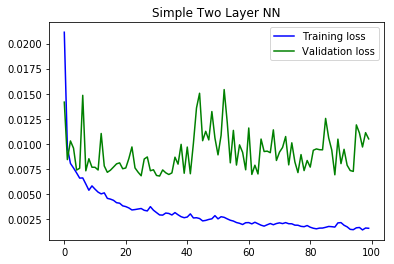

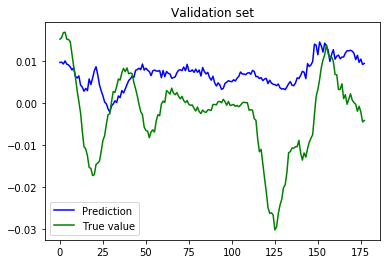

#############################evaluation mae and rmse#######################################
{'MAE': 0.01050103772804623, 'RMSE': 0.012908934264146769}


In [6]:
# Get train and validation loss for each epoch presenting in graphs
c.NN_model.get_res()

(c) Build and train an RNN model with an LSTM layer and print the train and validation loss 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 500       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________
None
Train on 3103 samples, validate on 178 samples
Epoch 1/50
3103/3103 [==============================] - 3s 969us/step - loss: 0.3233 - mean_squared_error: 0.2135 - val_loss: 0.9084 - val_mean_squared_error: 0.8715
Epoch 2/50
3103/3103 [==============================] - 1s 365us/step - loss: 0.1313 - mean_squared_error: 0.0377 - val_loss: 0.5850 - val_mean_squared_error: 0.3878
Epoch 3/50
3103/3103 [==============================] - 1s 384us/step - loss: 0.0808 - mean_squared_error: 0.0138 - val_loss: 0.4738 -

3103/3103 [==============================] - 1s 345us/step - loss: 0.0092 - mean_squared_error: 2.1215e-04 - val_loss: 0.0751 - val_mean_squared_error: 0.0075
Epoch 46/50
3103/3103 [==============================] - 1s 353us/step - loss: 0.0093 - mean_squared_error: 2.1034e-04 - val_loss: 0.0801 - val_mean_squared_error: 0.0084
Epoch 47/50
3103/3103 [==============================] - 1s 340us/step - loss: 0.0092 - mean_squared_error: 2.0805e-04 - val_loss: 0.0834 - val_mean_squared_error: 0.0090
Epoch 48/50
3103/3103 [==============================] - 1s 381us/step - loss: 0.0092 - mean_squared_error: 2.0712e-04 - val_loss: 0.0827 - val_mean_squared_error: 0.0089
Epoch 49/50
3103/3103 [==============================] - 1s 361us/step - loss: 0.0092 - mean_squared_error: 2.0268e-04 - val_loss: 0.0810 - val_mean_squared_error: 0.0085
Epoch 50/50
178/178 [==============================] - 0s 163us/step


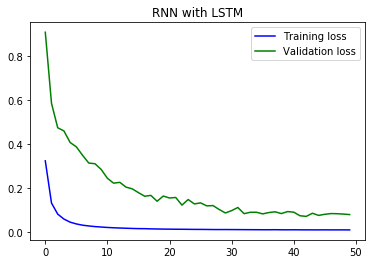

#############################evaluation mae and rmse#######################################
{'MAE': 0.07882010552479893, 'RMSE': 0.0903559234528621}


In [7]:
c.RNN_model.train_lstm()

(d) Build and train an RNN model with a GRU layer and print the train and validation loss

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 10)                900       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________
None
Train on 3103 samples, validate on 178 samples
Epoch 1/50
3103/3103 [==============================] - 2s 754us/step - loss: 0.3253 - mean_squared_error: 0.1692 - val_loss: 0.7775 - val_mean_squared_error: 0.6751
Epoch 2/50
3103/3103 [==============================] - 1s 182us/step - loss: 0.1273 - mean_squared_error: 0.0389 - val_loss: 0.5281 - val_mean_squared_error: 0.3099
Epoch 3/50
3103/3103 [==============================] - 1s 195us/step - loss: 0.0832 - mean_squared_error: 0.0176 - val_loss: 0.5640 -

3103/3103 [==============================] - 1s 177us/step - loss: 0.0111 - mean_squared_error: 2.7030e-04 - val_loss: 0.0894 - val_mean_squared_error: 0.0131
Epoch 46/50
3103/3103 [==============================] - 1s 172us/step - loss: 0.0112 - mean_squared_error: 2.6965e-04 - val_loss: 0.0854 - val_mean_squared_error: 0.0122
Epoch 47/50
3103/3103 [==============================] - 1s 177us/step - loss: 0.0104 - mean_squared_error: 2.3642e-04 - val_loss: 0.0778 - val_mean_squared_error: 0.0109
Epoch 48/50
3103/3103 [==============================] - 1s 176us/step - loss: 0.0103 - mean_squared_error: 2.3333e-04 - val_loss: 0.0732 - val_mean_squared_error: 0.0103
Epoch 49/50
3103/3103 [==============================] - 1s 176us/step - loss: 0.0102 - mean_squared_error: 2.2404e-04 - val_loss: 0.0780 - val_mean_squared_error: 0.0106
Epoch 50/50
178/178 [==============================] - 0s 157us/step


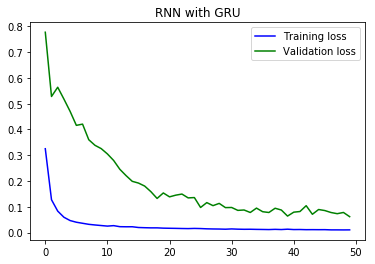

#############################evaluation mae and rmse#######################################
{'MAE': 0.06162115303118985, 'RMSE': 0.09119153402823502}


In [8]:
c.RNN_model.train_gru()

(e) Build and train an RNN model with a GRU layer and recurrent dropout and print the train and validation loss for each epoch 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10)                900       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________
None
Train on 3103 samples, validate on 178 samples
Epoch 1/50
3103/3103 [==============================] - 3s 926us/step - loss: 0.3300 - mean_squared_error: 0.1806 - val_loss: 0.6002 - val_mean_squared_error: 0.3975
Epoch 2/50
3103/3103 [==============================] - 1s 219us/step - loss: 0.1780 - mean_squared_error: 0.0601 - val_loss: 0.3446 - val_mean_squared_error: 0.1334
Epoch 3/50
3103/3103 [==============================] - 1s 213us/step - loss: 0.1171 - mean_squared_error: 0.0257 - val_loss: 0.2975 -

3103/3103 [==============================] - 1s 193us/step - loss: 0.0122 - mean_squared_error: 3.3932e-04 - val_loss: 0.0421 - val_mean_squared_error: 0.0031
Epoch 46/50
3103/3103 [==============================] - 1s 203us/step - loss: 0.0121 - mean_squared_error: 3.1173e-04 - val_loss: 0.0436 - val_mean_squared_error: 0.0034
Epoch 47/50
3103/3103 [==============================] - 1s 198us/step - loss: 0.0124 - mean_squared_error: 3.2892e-04 - val_loss: 0.0424 - val_mean_squared_error: 0.0032
Epoch 48/50
3103/3103 [==============================] - 1s 188us/step - loss: 0.0112 - mean_squared_error: 2.7543e-04 - val_loss: 0.0439 - val_mean_squared_error: 0.0036
Epoch 49/50
3103/3103 [==============================] - 1s 200us/step - loss: 0.0113 - mean_squared_error: 2.7836e-04 - val_loss: 0.0408 - val_mean_squared_error: 0.0029
Epoch 50/50
178/178 [==============================] - 0s 146us/step


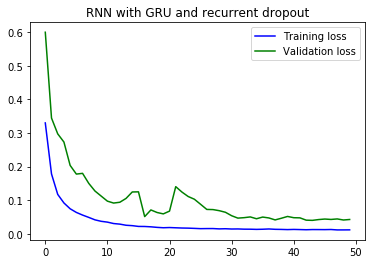

#############################evaluation mae and rmse#######################################
{'MAE': 0.04228941542544936, 'RMSE': 0.055669596099980845}


In [9]:
c.RNN_model.train_gru_drop()

(f) Add an additional GRU layer to (5) above with dropout and recurrent dropout and print the train and validation loss

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 28, 10)            900       
_________________________________________________________________
gru_6 (GRU)                  (None, 20)                1860      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 2,781
Trainable params: 2,781
Non-trainable params: 0
_________________________________________________________________
None
Train on 3103 samples, validate on 178 samples
Epoch 1/50
3103/3103 [==============================] - 5s 2ms/step - loss: 0.2779 - mean_squared_error: 0.1612 - val_loss: 0.1283 - val_mean_squared_error: 0.0203
Epoch 2/50
3103/3103 [==============================] - 1s 418us/step - loss: 0.0782 - mean_squared_error: 0.0115 - val_loss: 0.0497 - val_mean_squared_error: 0.0029


3103/3103 [==============================] - 1s 436us/step - loss: 0.0102 - mean_squared_error: 2.3504e-04 - val_loss: 0.0096 - val_mean_squared_error: 1.2296e-04
Epoch 44/50
3103/3103 [==============================] - 1s 390us/step - loss: 0.0103 - mean_squared_error: 2.3829e-04 - val_loss: 0.0145 - val_mean_squared_error: 2.5952e-04
Epoch 45/50
3103/3103 [==============================] - 1s 400us/step - loss: 0.0105 - mean_squared_error: 2.5378e-04 - val_loss: 0.0098 - val_mean_squared_error: 1.3153e-04
Epoch 46/50
3103/3103 [==============================] - 1s 455us/step - loss: 0.0102 - mean_squared_error: 2.3622e-04 - val_loss: 0.0088 - val_mean_squared_error: 1.1789e-04
Epoch 47/50
3103/3103 [==============================] - 1s 427us/step - loss: 0.0106 - mean_squared_error: 2.5261e-04 - val_loss: 0.0110 - val_mean_squared_error: 1.5786e-04
Epoch 48/50
3103/3103 [==============================] - 2s 486us/step - loss: 0.0106 - mean_squared_error: 2.5289e-04 - val_loss: 0.0071

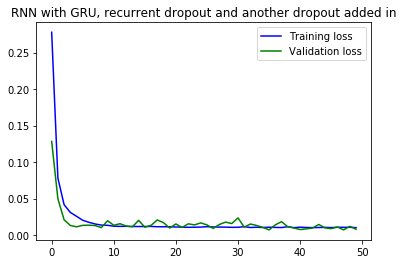

#############################evaluation mae and rmse#######################################
{'MAE': 0.00796496400068439, 'RMSE': 0.009664800145194424}


In [10]:
c.RNN_model.train_gru_drop_add()

(g) Build a classic time series model (ARIMA, or ARIMA with dynamic regression) and calculate train and validation loss.

In [11]:
# First check the stationary of data
c.ARMA_model.test_stationary()

ADF Statistic: -11.719362
p-value: 0.000000
stationary!


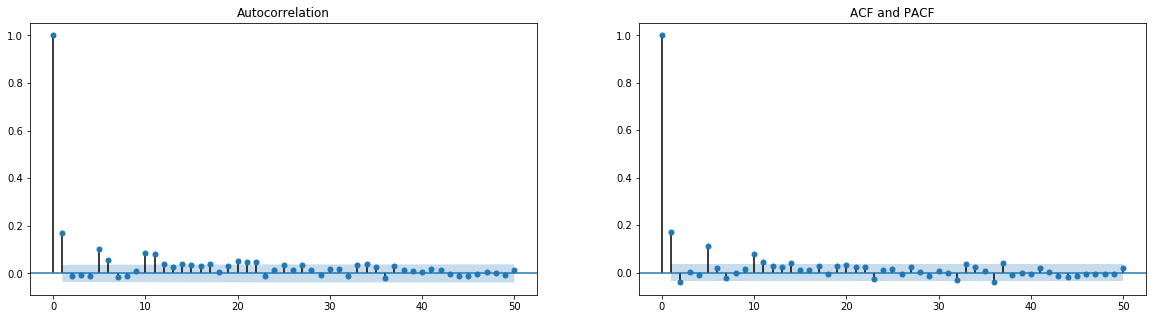

In [12]:
# Second, plot ACF and PACF
c.ARMA_model.plot_stats()

In [13]:
# Get train and validation loss
c.ARMA_model.eval_train()
c.ARMA_model.eval_val()

0 0 -9696.601410947165
0 1 -9790.265805070554
1 0 -9785.096398248283
1 1 -9788.933654525867
2 0 -9788.509771430636
2 1 -9790.369819267198
3 0 -9786.526443620773
3 1 -9812.25512416269
4 0 -9784.879115569907
4 1 -9790.727426001613
3 1
#############################evaluation mae and rmse#######################################
{'MAE': 0.028244084281566606, 'RMSE': 0.04968837836305946}
#############################evaluation mae and rmse#######################################
{'MAE': 0.039566610502320035, 'RMSE': 0.05593359532909888}


(h) Build an ensemble model that combines predictions from an RNN and an ARIMA model, and evaluate (using validation set) if they result in an improved performance.

In [14]:
print('MAE of Train set is: ' + str(c.Embed_model['Train MAE'])) 
print('RMSE of Train set is: ' + str(c.Embed_model['Train RMSE']))
print('MAE of Validation set is: ' + str(c.Embed_model['Valid MAE'])) 
print('RMSE of Validation set is: ' + str(c.Embed_model['Valid RMSE']))

MAE of Train set is: 0.009806730908920832
RMSE of Train set is: 0.014061145926125989
MAE of Validation set is: 0.012809052971248375
RMSE of Validation set is: 0.015705561541179594


# Part 4 

Evaluate each of the models in Part 3 on the test set, calculate MAE and RMSE (root mean squared error)

Identify and explain which model performs the best ----- In the write-up PDF

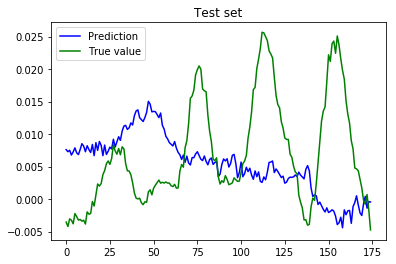

#############################evaluation mae and rmse#######################################
{'MAE': 0.008713692900141738, 'RMSE': 0.010893667855589201}


In [15]:
# NN
c.NN_model.pred_test()

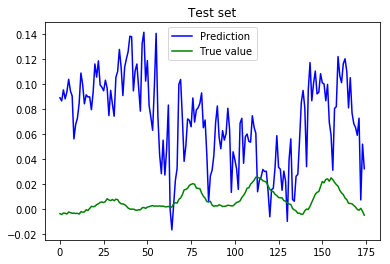

#############################evaluation mae and rmse#######################################
{'MAE': 0.06480573223599354, 'RMSE': 0.07381017749442698}


In [16]:
# RNN WITH LSTM
c.RNN_model.test_lstm()

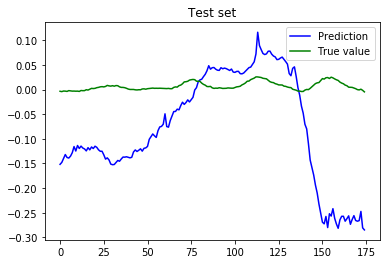

#############################evaluation mae and rmse#######################################
{'MAE': 0.11039719986207079, 'RMSE': 0.13859091600770304}


In [17]:
# RNN WITH GRU
c.RNN_model.test_gru()

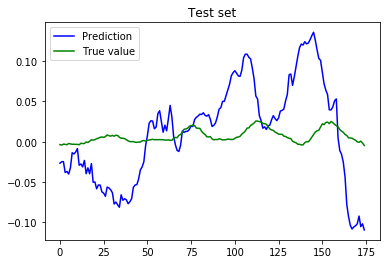

#############################evaluation mae and rmse#######################################
{'MAE': 0.04888996536423019, 'RMSE': 0.06041389172579821}


In [18]:
# RNN WITH GRU recurrent dropout
c.RNN_model.test_gru_dropout()

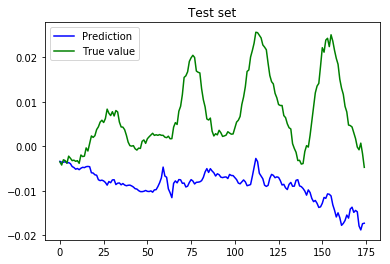

#############################evaluation mae and rmse#######################################
{'MAE': 0.015727417813838074, 'RMSE': 0.01821205329350191}


In [19]:
# RNN WITH GRU recurrent dropout and add-layer dropout
c.RNN_model.test_gru_dropout_add()

In [20]:
# ARMA
c.ARMA_model.eval_test()

#############################evaluation mae and rmse#######################################
{'MAE': 0.03123594660705482, 'RMSE': 0.045451051442546304}


In [21]:
# Embedded model
print('MAE of TEST set is: ' + str(c.Embed_model['Test MAE'])) 
print('RMSE of TEST set is: ' + str(c.Embed_model['Test RMSE']))

MAE of TEST set is: 0.010299189969276314
RMSE of TEST set is: 0.01354998172763026
